In [1]:
# Regular EDA (exploratory data analysis) and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Models from Scikit-learn
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_raw = pd.read_csv("../data/final_test.csv")
df_raw.head()

,weight,age,height,size
0,62,28.0,172.72,XL
1,59,36.0,167.64,L
2,61,34.0,165.10,M
3,65,27.0,175.26,L
4,62,45.0,172.72,M


In [3]:
df_raw.info()

<class 'pandas.DataFrame'>
RangeIndex: 119734 entries, 0 to 119733
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   weight  119734 non-null  int64  
 1   age     119477 non-null  float64
 2   height  119404 non-null  float64
 3   size    119734 non-null  str    
dtypes: float64(2), int64(1), str(1)
memory usage: 3.7 MB


In [4]:
df_raw.describe()

,weight,age,height
count,119734.000000,119477.000000,119404.000000
mean,61.756811,34.027311,165.805794
std,9.944863,8.149447,6.737651
min,22.000000,0.000000,137.160000
25%,55.000000,29.000000,160.020000
50%,61.000000,32.000000,165.100000
75%,67.000000,37.000000,170.180000
max,136.000000,117.000000,193.040000


In [5]:
#number of occurences for each size (target variable)
df_raw["size"].value_counts()

size
M       29712
S       21924
XXXL    21359
XL      19119
L       17587
XXS      9964
XXL        69
Name: count, dtype: int64

<Axes: xlabel='size', ylabel='count'>

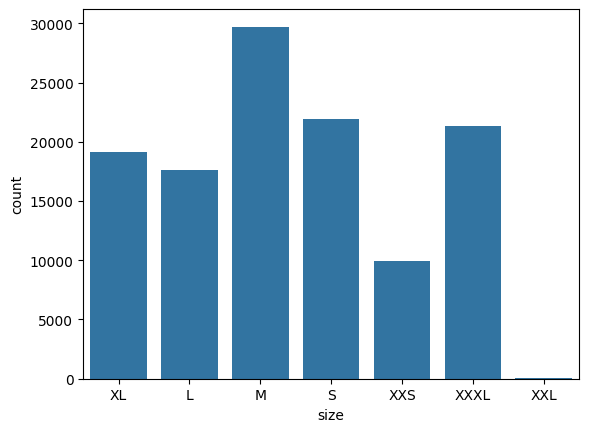

In [6]:
sns.countplot(x=df_raw['size'])

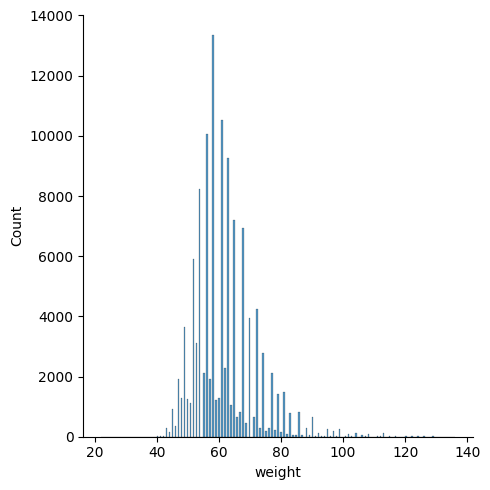

In [7]:
sns.displot(df_raw["weight"])

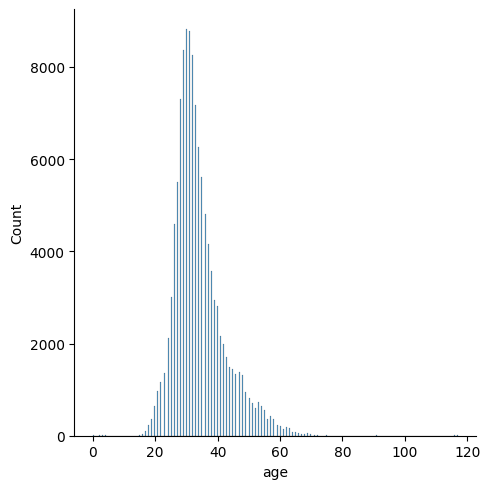

In [8]:
sns.displot(df_raw["age"])

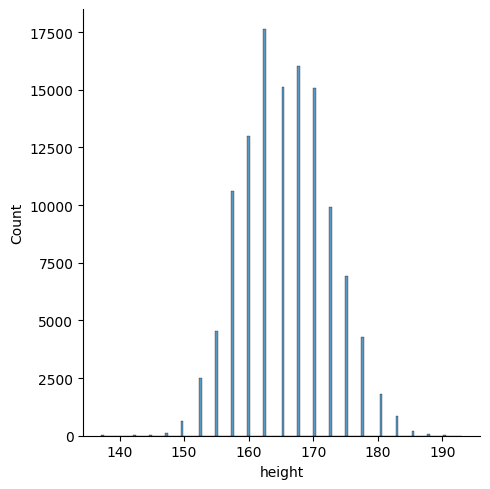

In [9]:
sns.displot(df_raw["height"])

In [10]:
#removing outliers
dfs = []
sizes = []
for size_type in df_raw['size'].unique():
    sizes.append(size_type)
    ndf = df_raw[['age','height','weight']][df_raw['size'] == size_type]
    zscore = ((ndf - ndf.mean())/ndf.std())
    dfs.append(zscore)
    
for i in range(len(dfs)):
    dfs[i]['age'] = dfs[i]['age'][(dfs[i]['age']>-3) & (dfs[i]['age']<3)]
    dfs[i]['height'] = dfs[i]['height'][(dfs[i]['height']>-3) & (dfs[i]['height']<3)]
    dfs[i]['weight'] = dfs[i]['weight'][(dfs[i]['weight']>-3) & (dfs[i]['weight']<3)]

for i in range(len(sizes)):
    dfs[i]['size'] = sizes[i]
df_raw = pd.concat(dfs)
df_raw.head()

,age,height,weight,size
0,-0.833326,0.767729,-0.660757,XL
24,-0.713290,1.539527,1.556338,XL
25,-0.353183,-1.161765,-0.291241,XL
28,-0.473219,-1.933562,-1.399788,XL
34,0.126960,-0.775866,0.447791,XL


In [11]:
df_raw.isna().sum()

age       1678
height     547
weight    1069
size         0
dtype: int64

In [12]:
#Filling missing data
df_raw["age"] = df_raw["age"].fillna(df_raw['age'].median())
df_raw["height"] = df_raw["height"].fillna(df_raw['height'].median())
df_raw["weight"] = df_raw["weight"].fillna(df_raw['weight'].median())

In [13]:
df_raw['size'] = df_raw['size'].map({"XXS": 1,
                                    "S": 2,
                                    "M": 3,
                                    "L": 4,
                                    "XL": 5,
                                    "XXL": 6,
                                    "XXXL": 7})

In [14]:
df_raw.isna().sum()

age       0
height    0
weight    0
size      0
dtype: int64

In [15]:
df_raw

,age,height,weight,size
0,-0.833326,0.767729,-0.660757,5
24,-0.713290,1.539527,1.556338,5
25,-0.353183,-1.161765,-0.291241,5
28,-0.473219,-1.933562,-1.399788,5
34,0.126960,-0.775866,0.447791,5
...,...,...,...,...
112707,-1.236027,-1.489537,0.318135,6
114732,-0.633300,-0.052082,1.494100,6
114803,-0.432391,-0.052082,0.514129,6
114994,0.973972,-0.052082,-0.465841,6


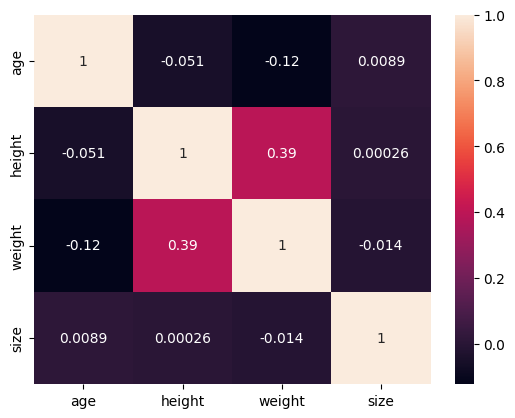

In [16]:
corr = sns.heatmap(df_raw.corr(), annot=True)

In [17]:
#features
X = df_raw[["height", "weight", "age"]]

#target
y = df_raw["size"]

In [18]:
X.head()

,height,weight,age
0,0.767729,-0.660757,-0.833326
24,1.539527,1.556338,-0.713290
25,-1.161765,-0.291241,-0.353183
28,-1.933562,-1.399788,-0.473219
34,-0.775866,0.447791,0.126960


In [19]:
y.head()

0     5
24    5
25    5
28    5
34    5
Name: size, dtype: int64

In [20]:
#splitting data into training set and validation set
X_train, X_test, y_train, y_test, = train_test_split(X,y, test_size=0.10)

In [21]:
len(X_train), len(X_test)

(107760, 11974)

In [22]:
#MLP sebelum 
from sklearn.neural_network import MLPClassifier

# Membuat objek MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000)

# Melatih model
mlp.fit(X_train, y_train)

# Memprediksi nilai target
y_pred = mlp.predict(X_test)

# Akurasi
from sklearn.metrics import accuracy_score
print('Accuracy: {:.2f}%'.format(accuracy_score(y_test,y_pred)*100))

print(classification_report(y_test, y_pred))

# Generate confusion matrix
print(confusion_matrix(y_test, y_pred))

Accuracy: 88.78%
              precision    recall  f1-score   support

           1       0.73      0.85      0.78       997
           2       0.93      0.94      0.94      2235
           3       0.92      0.95      0.93      2982
           4       0.85      0.89      0.87      1788
           5       0.91      0.85      0.88      1881
           6       0.00      0.00      0.00         9
           7       0.91      0.80      0.85      2082

    accuracy                           0.89     11974
   macro avg       0.75      0.75      0.75     11974
weighted avg       0.89      0.89      0.89     11974

[[ 852   13   13  101    8    0   10]
 [  70 2104   14   36    6    0    5]
 [  77   44 2821    8    5    0   27]
 [  78   50   12 1591   25    0   32]
 [  39   19  104   42 1594    0   83]
 [   0    1    0    1    1    0    6]
 [  59   34  115   92  114    0 1668]]


In [23]:
#NAIVE BAYES sebelum 
from sklearn.naive_bayes import GaussianNB

# Misalkan Anda memiliki data X dan y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# Inisialisasi dan melatih model Gaussian Naive Bayes
nb_model = GaussianNB()

# Melakukan training
nb_model.fit(X_train, y_train)

# Melakukan prediksi pada data uji
y_pred = nb_model.predict(X_test)

# Matriks kebingungan (confusion matrix)
print('\nConfusion Matrix:')
print(confusion_matrix(y_test,y_pred))

# Akurasi
accuracy = accuracy_score(y_test, y_pred)
print('\nAccuracy: {:.2f}%'.format(accuracy * 100))

# Laporan klasifikasi
print('\nClassification Report:')
print(classification_report(y_test,y_pred))


Confusion Matrix:
[[   0    0 1930    0    0    0   30]
 [   0    0 4308    0    2    0  104]
 [   0    0 5736    0    2    0  168]
 [   0    0 3440    0    0    0  110]
 [   0    0 3747    0    3    0  105]
 [   0    0   15    0    0    0    0]
 [   0    0 4116    0    2    0  129]]

Accuracy: 24.50%

Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      1960
           2       0.00      0.00      0.00      4414
           3       0.25      0.97      0.39      5906
           4       0.00      0.00      0.00      3550
           5       0.33      0.00      0.00      3855
           6       0.00      0.00      0.00        15
           7       0.20      0.03      0.05      4247

    accuracy                           0.25     23947
   macro avg       0.11      0.14      0.06     23947
weighted avg       0.15      0.25      0.11     23947



In [24]:
# Decision Tree
# Misalkan Anda memiliki data X dan y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# Inisialisasi dan melatih model Decision Tree
dt_model = DecisionTreeClassifier()

# Melakukan training
dt_model.fit(X_train, y_train)

# Melakukan prediksi pada data uji
y_pred = dt_model.predict(X_test)

# Matriks kebingungan (confusion matrix)
print('\nConfusion Matrix:')
print(confusion_matrix(y_test,y_pred))

# Akurasi
accuracy = accuracy_score(y_test, y_pred)
print('\nAccuracy: {:.2f}%'.format(accuracy * 100))

# Laporan klasifikasi
print('\nClassification Report:')
print(classification_report(y_test,y_pred))


Confusion Matrix:
[[2075    0    1    0    0    0    0]
 [   0 4370    1    0    0    0    2]
 [   0    0 5879    0    0    0    1]
 [   1    0    0 3476    0    0    0]
 [   0    0    0    0 3870    0    0]
 [   0    0    0    0    0    9    1]
 [   0    0    1    0    0    0 4260]]

Accuracy: 99.97%

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      2076
           2       1.00      1.00      1.00      4373
           3       1.00      1.00      1.00      5880
           4       1.00      1.00      1.00      3477
           5       1.00      1.00      1.00      3870
           6       1.00      0.90      0.95        10
           7       1.00      1.00      1.00      4261

    accuracy                           1.00     23947
   macro avg       1.00      0.99      0.99     23947
weighted avg       1.00      1.00      1.00     23947



In [25]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import joblib
import os

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# Initialize models
mlp_model = MLPClassifier()
nb_model = GaussianNB()
dt_model = DecisionTreeClassifier()

# Cross validation scores
mlp_scores = cross_val_score(mlp_model, X_train, y_train, cv=10)
nb_scores  = cross_val_score(nb_model, X_train, y_train, cv=10)
dt_scores  = cross_val_score(dt_model, X_train, y_train, cv=10)

# Train ALL final models (IMPORTANT!)
mlp_model.fit(X_train, y_train)
nb_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)

print("All models trained successfully!")

# Print accuracy
print("MLP Accuracy: {:.2f}%".format(mlp_scores.mean() * 100))
print("Naive Bayes Accuracy: {:.2f}%".format(nb_scores.mean() * 100))
print("Decision Tree Accuracy: {:.2f}%".format(dt_scores.mean() * 100))

# Save models correctly
os.makedirs("../models", exist_ok=True)

joblib.dump(dt_model, "../models/decision_tree_model.pkl")
joblib.dump(mlp_model, "../models/mlp_model.pkl")
joblib.dump(nb_model, "../models/naive_bayes_model.pkl")

print("All 3 models saved successfully!")

All models trained successfully!
MLP Accuracy: 44.21%
Naive Bayes Accuracy: 24.73%
Decision Tree Accuracy: 99.94%
All 3 models saved successfully!
